In [1]:
import context
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable


******************************
context imported. Front of path:
/Users/rodell/atsc507
/private/var/folders/hc/bh1xlzfj3_n4c5gz42dbpw400000gn/T/4354c5f2-ad78-4b0e-a99d-31e2636ba431
******************************

through /Users/rodell/atsc507/py/context.py -- pha
through /Users/rodell/atsc507/cr507/__init__.py pha II


In [2]:

## Constants
a = 0.0293 ## 0.0293 km/K


## Set delta x and z
dx, dz = (20., 1.)

## Set range in x and z
x = np.arange(0, 1000, dx)
z = np.arange(0, 30, dz)

## create 2D array (domain) of x and z
xx, zz = np.meshgrid(x, z)

## create mnt range on surface of domain
z_si = 1 + np.cos(2.*(3.14159)*(x-500.) / 500.)
## apply condtion for mnt location
z_surf = np.where((250 < x) & (x < 750), z_si, 0 )


In [3]:

## Solve for temperature across domain 
T_trop = (40 - 0.08 * xx) - 6.5*zz  ## Within hypotehtical troposphere
T_iso = (40 - 0.08 * xx) - 6.5*12   ## Above hypotehtical troposphere (isothermal)

## Apply condition to set temps above "tropopause" to be isothermal
T = np.where(zz < 12, T_trop, T_iso)
## Convert to Kelvin for later calcualtions
T = T + 273.15
T = np.vstack((T, T[-1,:]))




In [4]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

def pressure(P_1,T):
    P_2 = P_1 * np.exp((-dz)/(a*T))
    return P_2

P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    P_2 = pressure(P_slp,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


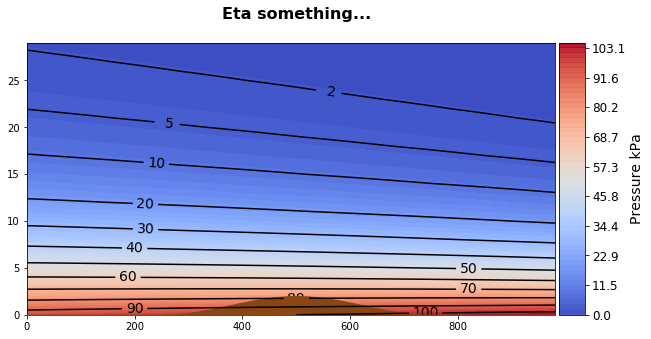

In [5]:
# %matplotlib



## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Eta something...', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_surf, color = 'saddlebrown', zorder = 4)

## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_final, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_final)
C = ax.contourf(xx, zz, P_final, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# C = ax.contourf(xx, zz, T, cmap = 'coolwarm', norm = Cnorm, levels = v)
# clb = plt.colorbar(C,cax=cax, extend='both')
# clb.set_label('Pressure kPa', fontsize = plt_set.label)
# clb.ax.tick_params(labelsize= plt_set.tick_size) 
# clb.set_alpha(.95)
# clb.draw_all()

#ax.set_xlabel("Wind Speed $(ms^-1)$", fontsize= plt_set.label)
#ax.set_ylabel("Height Above Ground Level  \n (AGL)", fontsize= plt_set.label)
#ax.tick_params(axis='both', which='major', labelsize= plt_set.tick_size)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
#ax.set_facecolor('lightgrey')
#ax.legend(loc='best')
   



 Solve for Eta using the equations from WRFv4 Tech Notes

In [6]:



P_d = B(eta)(P_surf-P_top) + (eta-B(eta))8(P_0 - P-top) + P_top












SyntaxError: invalid syntax (<ipython-input-6-4913ed16e4e1>, line 1)

In [7]:
%matplotlib



## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Eta something...', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_surf, color = 'saddlebrown', zorder = 4)

## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_final, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_final)
C = ax.contourf(xx, zz, P_final, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# C = ax.contourf(xx, zz, T, cmap = 'coolwarm', norm = Cnorm, levels = v)
# clb = plt.colorbar(C,cax=cax, extend='both')
# clb.set_label('Pressure kPa', fontsize = plt_set.label)
# clb.ax.tick_params(labelsize= plt_set.tick_size) 
# clb.set_alpha(.95)
# clb.draw_all()

#ax.set_xlabel("Wind Speed $(ms^-1)$", fontsize= plt_set.label)
#ax.set_ylabel("Height Above Ground Level  \n (AGL)", fontsize= plt_set.label)
#ax.tick_params(axis='both', which='major', labelsize= plt_set.tick_size)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
#ax.set_facecolor('lightgrey')
#ax.legend(loc='best')
   



Using matplotlib backend: MacOSX


In [8]:
import context
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [9]:

## Constants
a = 0.0293 ## 0.0293 km/K


## Set delta x and z
dx, dz = (20., .001)

## Set range in x and z
x = np.arange(0, 1000, dx)
z = np.arange(0, 30, dz)

## create 2D array (domain) of x and z
xx, zz = np.meshgrid(x, z)

## create mnt range on surface of domain
z_si = 1 + np.cos(2.*(3.14159)*(x-500.) / 500.)
## apply condtion for mnt location
z_surf = np.where((250 < x) & (x < 750), z_si, 0 )


In [10]:

## Solve for temperature across domain 
T_trop = (40 - 0.08 * xx) - 6.5*zz  ## Within hypotehtical troposphere
T_iso = (40 - 0.08 * xx) - 6.5*12   ## Above hypotehtical troposphere (isothermal)

## Apply condition to set temps above "tropopause" to be isothermal
T = np.where(zz < 12, T_trop, T_iso)
## Convert to Kelvin for later calcualtions
T = T + 273.15
T = np.vstack((T, T[-1,:]))




In [11]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

def pressure(P_1,T):
    P_2 = P_1 * np.exp((-dz)/(a*T))
    return P_2

P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    P_2 = pressure(P_slp,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


In [12]:
%matplotlib



## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Eta something...', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_surf, color = 'saddlebrown', zorder = 4)

## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_final, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_final)
C = ax.contourf(xx, zz, P_final, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# C = ax.contourf(xx, zz, T, cmap = 'coolwarm', norm = Cnorm, levels = v)
# clb = plt.colorbar(C,cax=cax, extend='both')
# clb.set_label('Pressure kPa', fontsize = plt_set.label)
# clb.ax.tick_params(labelsize= plt_set.tick_size) 
# clb.set_alpha(.95)
# clb.draw_all()

#ax.set_xlabel("Wind Speed $(ms^-1)$", fontsize= plt_set.label)
#ax.set_ylabel("Height Above Ground Level  \n (AGL)", fontsize= plt_set.label)
#ax.tick_params(axis='both', which='major', labelsize= plt_set.tick_size)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
#ax.set_facecolor('lightgrey')
#ax.legend(loc='best')
   



Using matplotlib backend: MacOSX


 Solve for Eta using the equations from WRFv4 Tech Notes

In [13]:



# P_d = B(eta)(P_surf-P_top) + (eta-B(eta))8(P_0 - P-top) + P_top












In [14]:
import context
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [15]:

## Constants
a = 0.0293 ## 0.0293 km/K


## Set delta x and z
dx, dz = (20., 1.)

## Set range in x and z
x = np.arange(0, 1000, dx)
z = np.arange(0, 30, dz)

## create 2D array (domain) of x and z
xx, zz = np.meshgrid(x, z)

## create mnt range on surface of domain
z_si = 1 + np.cos(2.*(3.14159)*(x-500.) / 500.)
## apply condtion for mnt location
z_surf = np.where((250 < x) & (x < 750), z_si, 0 )


In [16]:

## Solve for temperature across domain 
T_trop = (40 - 0.08 * xx) - 6.5*zz  ## Within hypotehtical troposphere
T_iso = (40 - 0.08 * xx) - 6.5*12   ## Above hypotehtical troposphere (isothermal)

## Apply condition to set temps above "tropopause" to be isothermal
T = np.where(zz < 12, T_trop, T_iso)
## Convert to Kelvin for later calcualtions
T = T + 273.15
T = np.vstack((T, T[-1,:]))




In [17]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

def pressure(P_1,T):
    P_2 = P_1 * np.exp((-dz)/(a*T))
    return P_2

P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    P_2 = pressure(P_slp,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


In [18]:
%matplotlib



## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Eta something...', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_surf, color = 'saddlebrown', zorder = 4)

## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_final, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_final)
C = ax.contourf(xx, zz, P_final, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# C = ax.contourf(xx, zz, T, cmap = 'coolwarm', norm = Cnorm, levels = v)
# clb = plt.colorbar(C,cax=cax, extend='both')
# clb.set_label('Pressure kPa', fontsize = plt_set.label)
# clb.ax.tick_params(labelsize= plt_set.tick_size) 
# clb.set_alpha(.95)
# clb.draw_all()

#ax.set_xlabel("Wind Speed $(ms^-1)$", fontsize= plt_set.label)
#ax.set_ylabel("Height Above Ground Level  \n (AGL)", fontsize= plt_set.label)
#ax.tick_params(axis='both', which='major', labelsize= plt_set.tick_size)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
#ax.set_facecolor('lightgrey')
#ax.legend(loc='best')
   



Using matplotlib backend: MacOSX


 Solve for Eta using the equations from WRFv4 Tech Notes

In [19]:



# P_d = B(eta)(P_surf-P_top) + (eta-B(eta))8(P_0 - P-top) + P_top












In [20]:
import context
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [21]:

## Constants
a = 0.0293 ## 0.0293 km/K


## Set delta x and z
dx, dz = (20., 1.)

## Set range in x and z
x = np.arange(0, 1000, dx)
z = np.arange(0, 30, dz)

## create 2D array (domain) of x and z
xx, zz = np.meshgrid(x, z)

## create mnt range on surface of domain
z_si = 1 + np.cos(2.*(3.14159)*(x-500.) / 500.)
## apply condtion for mnt location
z_surf = np.where((250 < x) & (x < 750), z_si, 0 )


In [22]:

## Solve for temperature across domain 
T_trop = (40 - 0.08 * xx) - 6.5*zz  ## Within hypotehtical troposphere
T_iso = (40 - 0.08 * xx) - 6.5*12   ## Above hypotehtical troposphere (isothermal)

## Apply condition to set temps above "tropopause" to be isothermal
T = np.where(zz < 12, T_trop, T_iso)
## Convert to Kelvin for later calcualtions
T = T + 273.15
T = np.vstack((T, T[-1,:]))




In [23]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

def pressure(P_1,T):
    P_2 = P_1 * np.exp((-dz)/(a*T))
    return P_2

P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    P_2 = pressure(P_slp,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


In [24]:
%matplotlib



## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Eta something...', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_surf, color = 'saddlebrown', zorder = 4)

## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_final, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_final)
C = ax.contourf(xx, zz, P_final, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# C = ax.contourf(xx, zz, T, cmap = 'coolwarm', norm = Cnorm, levels = v)
# clb = plt.colorbar(C,cax=cax, extend='both')
# clb.set_label('Pressure kPa', fontsize = plt_set.label)
# clb.ax.tick_params(labelsize= plt_set.tick_size) 
# clb.set_alpha(.95)
# clb.draw_all()

#ax.set_xlabel("Wind Speed $(ms^-1)$", fontsize= plt_set.label)
#ax.set_ylabel("Height Above Ground Level  \n (AGL)", fontsize= plt_set.label)
#ax.tick_params(axis='both', which='major', labelsize= plt_set.tick_size)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
#ax.set_facecolor('lightgrey')
#ax.legend(loc='best')
   



Using matplotlib backend: MacOSX


 Solve for Eta using the equations from WRFv4 Tech Notes

In [25]:



# P_d = B(eta)(P_surf-P_top) + (eta-B(eta))8(P_0 - P-top) + P_top












In [26]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

# def pressure(P_1,T):
#     P_2 = P_1 * np.exp((-dz)/(a*T))
#     return P_2
def pressure(P_1,Z, T):
    P_2 = P_1 * np.exp((-np.diff(Z))/(a*T))
    return P_2


P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    P_2 = pressure(P_slp,zz,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


ValueError: operands could not be broadcast together with shapes (30,49) (50,) 

In [27]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

# def pressure(P_1,T):
#     P_2 = P_1 * np.exp((-dz)/(a*T))
#     return P_2
def pressure(P_1,Z, T):
    P_2 = P_1 * np.exp((-np.diff(Z))/(a*T))
    return P_2


P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    zz = np.vstack((zz,zz[-1,:]))
    P_2 = pressure(P_slp,zz,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


ValueError: operands could not be broadcast together with shapes (31,49) (50,) 

In [28]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

# def pressure(P_1,T):
#     P_2 = P_1 * np.exp((-dz)/(a*T))
#     return P_2
def pressure(P_1,Z, T):
    P_2 = P_1 * np.exp((-np.diff(Z))/(a*T))
    return P_2


P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    zz = np.vstack((zz,zz[-1,:]))
    P_2 = pressure(P_slp,zz,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


ValueError: operands could not be broadcast together with shapes (32,49) (50,) 

In [29]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

# def pressure(P_1,T):
#     P_2 = P_1 * np.exp((-dz)/(a*T))
#     return P_2
def pressure(P_1,Z, T):
    P_2 = P_1 * np.exp((-np.diff(Z))/(a*T))
    return P_2


P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    # zz = np.vstack((zz,zz[-1,:]))
    P_2 = pressure(P_slp,zz,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


ValueError: operands could not be broadcast together with shapes (32,49) (50,) 

In [1]:
import context
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable


******************************
context imported. Front of path:
/Users/rodell/atsc507
/private/var/folders/hc/bh1xlzfj3_n4c5gz42dbpw400000gn/T/4354c5f2-ad78-4b0e-a99d-31e2636ba431
******************************

through /Users/rodell/atsc507/py/context.py -- pha
through /Users/rodell/atsc507/cr507/__init__.py pha II


In [2]:

## Constants
a = 0.0293 ## 0.0293 km/K


## Set delta x and z
dx, dz = (20., 1.)

## Set range in x and z
x = np.arange(0, 1000, dx)
z = np.arange(0, 30, dz)

## create 2D array (domain) of x and z
xx, zz = np.meshgrid(x, z)

## create mnt range on surface of domain
z_si = 1 + np.cos(2.*(3.14159)*(x-500.) / 500.)
## apply condtion for mnt location
z_surf = np.where((250 < x) & (x < 750), z_si, 0 )


In [3]:

## Solve for temperature across domain 
T_trop = (40 - 0.08 * xx) - 6.5*zz  ## Within hypotehtical troposphere
T_iso = (40 - 0.08 * xx) - 6.5*12   ## Above hypotehtical troposphere (isothermal)

## Apply condition to set temps above "tropopause" to be isothermal
T = np.where(zz < 12, T_trop, T_iso)
## Convert to Kelvin for later calcualtions
T = T + 273.15
T = np.vstack((T, T[-1,:]))




In [4]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

# def pressure(P_1,T):
#     P_2 = P_1 * np.exp((-dz)/(a*T))
#     return P_2
def pressure(P_1,Z, T):
    P_2 = P_1 * np.exp((-np.diff(Z))/(a*T))
    return P_2


P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    # zz = np.vstack((zz,zz[-1,:]))
    P_2 = pressure(P_slp,zz,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


ValueError: operands could not be broadcast together with shapes (30,49) (50,) 

In [5]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

# def pressure(P_1,T):
#     P_2 = P_1 * np.exp((-dz)/(a*T))
#     return P_2
def pressure(P_1,Z, T):
    P_2 = P_1 * np.exp((-np.diff(Z, axis=0))/(a*T))
    return P_2


P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    zz = np.vstack((zz,zz[-1,:]))
    P_2 = pressure(P_slp,zz,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


ValueError: operands could not be broadcast together with shapes (30,50) (31,50) 

In [7]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

def pressure(P_1,T):
    P_2 = P_1 * np.exp((-dz)/(a*T))
    return P_2
# def pressure(P_1,Z, T):
#     P_2 = P_1 * np.exp((-np.diff(Z, axis=0))/(a*T))
#     return P_2


P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    # zz = np.vstack((zz,zz[-1,:]))
    P_2 = pressure(P_slp,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


In [8]:
%matplotlib



## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Eta something...', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_surf, color = 'saddlebrown', zorder = 4)

## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_final, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_final)
C = ax.contourf(xx, zz, P_final, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# C = ax.contourf(xx, zz, T, cmap = 'coolwarm', norm = Cnorm, levels = v)
# clb = plt.colorbar(C,cax=cax, extend='both')
# clb.set_label('Pressure kPa', fontsize = plt_set.label)
# clb.ax.tick_params(labelsize= plt_set.tick_size) 
# clb.set_alpha(.95)
# clb.draw_all()

#ax.set_xlabel("Wind Speed $(ms^-1)$", fontsize= plt_set.label)
#ax.set_ylabel("Height Above Ground Level  \n (AGL)", fontsize= plt_set.label)
#ax.tick_params(axis='both', which='major', labelsize= plt_set.tick_size)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
#ax.set_facecolor('lightgrey')
#ax.legend(loc='best')
   



Using matplotlib backend: MacOSX


TypeError: Shape of y does not match that of z: found (32, 50) instead of (30, 50).

In [1]:
import context
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable


******************************
context imported. Front of path:
/Users/rodell/atsc507
/private/var/folders/hc/bh1xlzfj3_n4c5gz42dbpw400000gn/T/4354c5f2-ad78-4b0e-a99d-31e2636ba431
******************************

through /Users/rodell/atsc507/py/context.py -- pha
through /Users/rodell/atsc507/cr507/__init__.py pha II


In [2]:

## Constants
a = 0.0293 ## 0.0293 km/K


## Set delta x and z
dx, dz = (20., 1.)

## Set range in x and z
x = np.arange(0, 1000, dx)
z = np.arange(0, 30, dz)

## create 2D array (domain) of x and z
xx, zz = np.meshgrid(x, z)

## create mnt range on surface of domain
z_si = 1 + np.cos(2.*(3.14159)*(x-500.) / 500.)
## apply condtion for mnt location
z_surf = np.where((250 < x) & (x < 750), z_si, 0 )


In [3]:

## Solve for temperature across domain 
T_trop = (40 - 0.08 * xx) - 6.5*zz  ## Within hypotehtical troposphere
T_iso = (40 - 0.08 * xx) - 6.5*12   ## Above hypotehtical troposphere (isothermal)

## Apply condition to set temps above "tropopause" to be isothermal
T = np.where(zz < 12, T_trop, T_iso)
## Convert to Kelvin for later calcualtions
T = T + 273.15
T = np.vstack((T, T[-1,:]))




In [4]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_slp = 95 + 0.01 * x

def pressure(P_1,T):
    P_2 = P_1 * np.exp((-dz)/(a*T))
    return P_2
# def pressure(P_1,Z, T):
#     P_2 = P_1 * np.exp((-np.diff(Z, axis=0))/(a*T))
#     return P_2


P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_slp)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    # zz = np.vstack((zz,zz[-1,:]))
    P_2 = pressure(P_slp,T_avg_i)
    P_slp = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


In [5]:
%matplotlib



## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Eta something...', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_surf, color = 'saddlebrown', zorder = 4)

## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_final, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_final)
C = ax.contourf(xx, zz, P_final, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# C = ax.contourf(xx, zz, T, cmap = 'coolwarm', norm = Cnorm, levels = v)
# clb = plt.colorbar(C,cax=cax, extend='both')
# clb.set_label('Pressure kPa', fontsize = plt_set.label)
# clb.ax.tick_params(labelsize= plt_set.tick_size) 
# clb.set_alpha(.95)
# clb.draw_all()

#ax.set_xlabel("Wind Speed $(ms^-1)$", fontsize= plt_set.label)
#ax.set_ylabel("Height Above Ground Level  \n (AGL)", fontsize= plt_set.label)
#ax.tick_params(axis='both', which='major', labelsize= plt_set.tick_size)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
#ax.set_facecolor('lightgrey')
#ax.legend(loc='best')
   



Using matplotlib backend: MacOSX


In [1]:
import context
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable


******************************
context imported. Front of path:
/Users/rodell/atsc507
/private/var/folders/hc/bh1xlzfj3_n4c5gz42dbpw400000gn/T/4354c5f2-ad78-4b0e-a99d-31e2636ba431
******************************

through /Users/rodell/atsc507/py/context.py -- pha
through /Users/rodell/atsc507/cr507/__init__.py pha II


In [2]:

## Constants
a = 0.0293 ## 0.0293 km/K


## Set delta x and z
dx, dz = (20., 1.)

## Set range in x and z
x = np.arange(0, 1000, dx)
z = np.arange(0, 30, dz)

## create 2D array (domain) of x and z
xx, zz = np.meshgrid(x, z)

## create mnt range on surface of domain
z_si = 1 + np.cos(2.*(3.14159)*(x-500.) / 500.)
## apply condtion for mnt location
z_ground = np.where((250 < x) & (x < 750), z_si, 0 )


In [3]:

## Solve for temperature across domain 
T_trop = (40 - 0.08 * xx) - 6.5*zz  ## Within hypotehtical troposphere
T_iso = (40 - 0.08 * xx) - 6.5*12   ## Above hypotehtical troposphere (isothermal)

## Apply condition to set temps above "tropopause" to be isothermal
T = np.where(zz < 12, T_trop, T_iso)
## Convert to Kelvin for later calcualtions
T = T + 273.15
T = np.vstack((T, T[-1,:]))




In [4]:
## Solve for pressure across the surface (x) of the domain (ie z = 0)
P_1 = 95 + 0.01 * x

def pressure(P_1,T):
    P_2 = P_1 * np.exp((-dz)/(a*T))
    return P_2

P_list, T_avg = [], []
for i in range(len(z)):
    P_list.append(P_1)
    T_avg_i = (T[i,:]+T[i+1,:])/2.
    T_avg.append(T_avg_i)
    # zz = np.vstack((zz,zz[-1,:]))
    P_2 = pressure(P_1,T_avg_i)
    P_1 = P_2




T_avg = np.stack(T_avg)
P_final = np.stack(P_list)


In [5]:
%matplotlib



## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(10,5))
fig.suptitle('Eta something...', fontsize= plt_set.title_size, fontweight="bold")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

def confil(var):
    """ 
    This funstion set up the extent for you color bar
    """
    v = np.linspace(0,105,56)
    Cnorm = colors.Normalize(vmin= np.min(var), vmax =np.max(var))
    return v, Cnorm

## Plot mnt
ax.fill_between(x,0, z_ground, color = 'saddlebrown', zorder = 4)

## Plot isobars
v_line = [2,5,10,20,30,40,50,60,70,80,90,100]
CS = ax.contour(xx, zz, P_final, levels = v_line, colors = 'black', zorder = 10)
ax.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

## contour pressure feild
v, Cnorm = confil(P_final)
C = ax.contourf(xx, zz, P_final, cmap = 'coolwarm', norm = Cnorm, levels = v, zorder = 1)
clb = plt.colorbar(C,cax=cax, extend='both')
clb.set_label('Pressure kPa', fontsize = plt_set.label)
clb.ax.tick_params(labelsize= plt_set.tick_size) 
clb.set_alpha(.95)
clb.draw_all()



# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# C = ax.contourf(xx, zz, T, cmap = 'coolwarm', norm = Cnorm, levels = v)
# clb = plt.colorbar(C,cax=cax, extend='both')
# clb.set_label('Pressure kPa', fontsize = plt_set.label)
# clb.ax.tick_params(labelsize= plt_set.tick_size) 
# clb.set_alpha(.95)
# clb.draw_all()

#ax.set_xlabel("Wind Speed $(ms^-1)$", fontsize= plt_set.label)
#ax.set_ylabel("Height Above Ground Level  \n (AGL)", fontsize= plt_set.label)
#ax.tick_params(axis='both', which='major', labelsize= plt_set.tick_size)
#ax.xaxis.grid(color='gray', linestyle='dashed')
#ax.yaxis.grid(color='gray', linestyle='dashed')
#ax.set_facecolor('lightgrey')
#ax.legend(loc='best')
   



Using matplotlib backend: MacOSX


 Solve for Surface Pressure at gorund level

In [6]:



P_2 = P_final * np.exp((zz[0,:]-z_ground)/(a*T_avg[0,:]))




 Solve for Eta using the equations from WRFv4 Tech Notes

In [7]:

# P_d = B(eta)(P_surf-P_top) + (eta-B(eta))8(P_0 - P-top) + P_top












In [8]:



P_2 = P_final[0,:] * np.exp((zz[0,:]-z_ground)/(a*T_avg[0,:]))




In [9]:
import context
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from cr507.utils import plt_set
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [10]:



P_2 = P_final[0,:] * np.exp((zz[0,:]-z_ground)/(a*T_avg[0,:]))

values = {'x(km)': xx[0:], 'Zground(km)': z_ground, 'Psfc(kPa)':P_2}

pd = pd.DataFrame(values, columns = ['x(km)', 'Zground(km)', 'Psfc(kPa)'])

pd


Exception: Data must be 1-dimensional

 Solve for Eta using the equations from WRFv4 Tech Notes

In [11]:



P_2 = P_final[0,:] * np.exp((zz[0,:]-z_ground)/(a*T_avg[0,:]))

values = {'x(km)': xx[0:], 'Zground(km)': z_ground, 'Psfc(kPa)':P_2}

pd = pd.DataFrame(values, columns = ['x(km)', 'Zground(km)', 'Psfc(kPa)'])

pd


Exception: Data must be 1-dimensional

In [12]:



P_2 = P_final[0,:] * np.exp((zz[0,:]-z_ground)/(a*T_avg[0,:]))

values = {'x(km)': x, 'Zground(km)': z_ground, 'Psfc(kPa)':P_2}

pd = pd.DataFrame(values, columns = ['x(km)', 'Zground(km)', 'Psfc(kPa)'])

pd


,x(km),Zground(km),Psfc(kPa)
0,0.0,0.000000,95.000000
1,20.0,0.000000,95.200000
2,40.0,0.000000,95.400000
3,60.0,0.000000,95.600000
4,80.0,0.000000,95.800000
5,100.0,0.000000,96.000000
6,120.0,0.000000,96.200000
7,140.0,0.000000,96.400000
8,160.0,0.000000,96.600000
9,180.0,0.000000,96.800000
